<h1>Lesson 5. Model selection: US Salary Prediction</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg" style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split


train=pd.read_csv('data/census-training.csv')
print(train.info())
train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
Age              48842 non-null int64
EducationNum     48842 non-null int64
MaritalStatus    48842 non-null object
Occupation       48842 non-null object
Relationship     48842 non-null object
Race             48842 non-null object
Gender           48842 non-null object
Hours/Week       48842 non-null int64
Country          48842 non-null object
Income           48842 non-null object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [2]:
train.nunique()

Age              74
EducationNum     16
MaritalStatus     7
Occupation       15
Relationship      6
Race              5
Gender            2
Hours/Week       96
Country          42
Income            4
dtype: int64

<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [3]:
# Command (s): remove the '?' special character and replace with NaN
train = train.replace('?', np.nan)

train.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

Age                 0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
Hours/Week          0
Country           857
Income              0
dtype: int64

<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [4]:
train.mode().iloc[0]

Age                              36
EducationNum                      9
MaritalStatus    Married-civ-spouse
Occupation           Prof-specialty
Relationship                Husband
Race                          White
Gender                         Male
Hours/Week                       40
Country               United-States
Income                        <=50K
Name: 0, dtype: object

In [5]:
#Command(s):
train = train.fillna(train.mode().iloc[0])

#train.mode() # finding mode to compute the most occuring item in every column
#replace missing values with their mode
train.isnull().sum() #checking the data for NaN values .... should all show 0 now

Age              0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
Hours/Week       0
Country          0
Income           0
dtype: int64

<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [6]:
print(train['Income'].value_counts())
print('\n')
print(train['Gender'].value_counts())

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: Income, dtype: int64


Male      32650
Female    16192
Name: Gender, dtype: int64


In [7]:
# converting Gender to "0" and "1" 
# return 1 if gender is Male, 0 otherwise
def gender_to_numeric(x):
    if x=='Male':
        return 1
    return 0
    
train['Gender'] = train['Gender'].apply(lambda x: gender_to_numeric(x))

# converting Income to "0" and "1" 
# return 1 f income is greater than 50k, 0 otherwise
def income_to_numeric(x):
    if x[:4]=='>50K':
        return 1
    return 0

train['Income'] = train['Income'].apply(lambda x: income_to_numeric(x))

train.head(10)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,0
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,0
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,1
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,1
4,18,10,Never-married,Prof-specialty,Own-child,White,0,30,United-States,0
5,34,6,Never-married,Other-service,Not-in-family,White,1,30,United-States,0
6,29,9,Never-married,Prof-specialty,Unmarried,Black,1,40,United-States,0
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,1,32,United-States,1
8,24,10,Never-married,Other-service,Unmarried,White,0,40,United-States,0
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,1,10,United-States,0


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [8]:
# Command(s) 
obj = train.select_dtypes(include=['object']) #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
for i in range(len(obj.columns)):
    train[obj.columns[i]] = le.fit_transform(train[obj.columns[i]])
    
train.head(10) #Inspect the data, all features should be numeric now

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,4,6,3,2,1,40,38,0
1,38,9,2,4,0,4,1,50,38,0
2,28,12,2,10,0,4,1,40,38,1
3,44,10,2,6,0,2,1,40,38,1
4,18,10,4,9,3,4,0,30,38,0
5,34,6,4,7,1,4,1,30,38,0
6,29,9,4,9,4,2,1,40,38,0
7,63,15,2,9,0,4,1,32,38,1
8,24,10,4,7,4,4,0,40,38,0
9,55,4,2,2,0,4,1,10,38,0


<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
target = 'Income'
features = list(train.drop(target,axis=1).columns.values)

X = train[features]
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

Logistic Regression Accuracy: 0.8084351327373234
Logistic Regression AUC: 0.8241351365862946


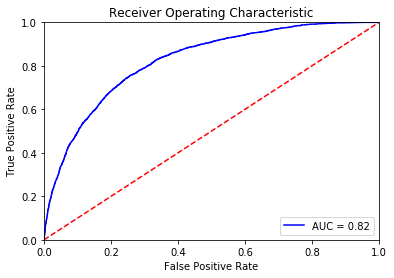

In [14]:
#Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, auc


log_rgr = LogisticRegression()
log_rgr = log_rgr.fit(X_train, y_train)

#predict on the test set
y_pred = log_rgr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr_lr, tpr_lr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print("Logistic Regression Accuracy: {}".format(lr_acc))
print("Logistic Regression AUC: {}".format(roc_auc_lr))

# Plot the ROC curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

KNN Accuracy: 0.8110284583361769
KNN AUC: 0.8516601124568508


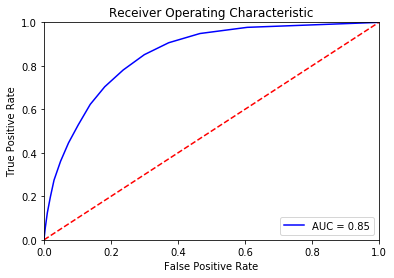

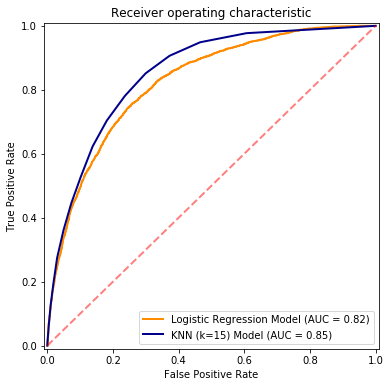

In [12]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr_knn, tpr_knn, threshold = metrics.roc_curve(y_test, preds)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("KNN Accuracy: {}".format(knn_acc))
print("KNN AUC: {}".format(roc_auc_knn))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Compare results
# The KNN model performs slightly better than the logistic regression model with a better accuracy, AUC, and ROC curve.

fig, ax = plt.subplots(figsize=(6,6))
lw = 2
ax.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label="Logistic Regression Model (AUC = %.2f)" % (roc_auc_lr))
ax.plot(fpr_knn, tpr_knn, color='darkblue', lw=lw, label="KNN (k=15) Model (AUC = %.2f)" % (roc_auc_knn))
ax.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', alpha=0.5)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
leg = ax.legend(loc="lower right")
plt.show()

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

In [21]:
features

['Age',
 'EducationNum',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Hours/Week',
 'Country']

RFE Logistic Regression Accuracy: 0.8110967037466731
RFE Logistic Regression AUC: 0.7947372778508094


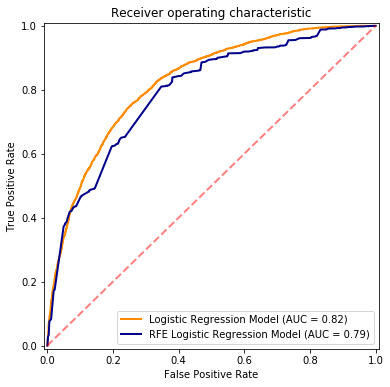

In [20]:
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import RFE

log_rgr = LogisticRegression()
rfe = RFE(log_rgr, 5)
rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr_lr_rfe, tpr_lr_rfe, threshold = metrics.roc_curve(y_test, preds)
roc_auc_lr_rfe = auc(fpr_lr_rfe, tpr_lr_rfe)
print("RFE Logistic Regression Accuracy: {}".format(lr_acc))
print("RFE Logistic Regression AUC: {}".format(roc_auc_lr_rfe))

fig, ax = plt.subplots(figsize=(6,6))

lw = 2
ax.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label="Logistic Regression Model (AUC = %.2f)" % (roc_auc_lr))
ax.plot(fpr_lr_rfe, tpr_lr_rfe, color='darkblue', lw=lw, label="RFE Logistic Regression Model (AUC = %.2f)" % (roc_auc_lr_rfe))
ax.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', alpha=0.5)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
leg = ax.legend(loc="lower right")
plt.show()


# The logistic regression model with recursive feature elimination (5 features) performs marginally worse that the full
# logistic regression model (9 features). This implies that the additional features are providing additional predictive 
# power to the model and cannot be ignored. Note that only about 7 features are needed to achieve the same ROC and AUC 
# metric (see below).

RFE3, AUC = 0.792
RFE4, AUC = 0.794
RFE5, AUC = 0.795
RFE6, AUC = 0.812
RFE7, AUC = 0.824
RFE8, AUC = 0.824
RFE9, AUC = 0.824


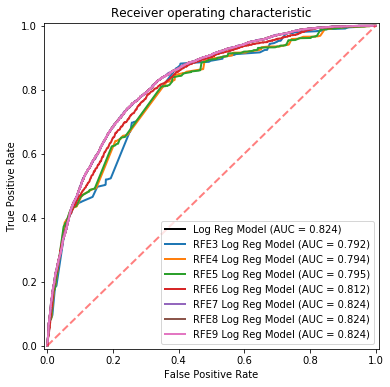

In [30]:
fprs = []
tprs = []
nfeats = []
for i in range(3,10):
    log_rgr = LogisticRegression()
    rfe = RFE(log_rgr, i)
    rfe.fit(X_train, y_train)

    probs = rfe.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    fprs.append(fpr)
    tprs.append(tpr)
    nfeats.append(i)

fig, ax = plt.subplots(figsize=(6,6))

lw = 2
ax.plot(fpr_lr, tpr_lr, color='black', lw=lw, label="Log Reg Model (AUC = %.3f)" % (roc_auc_lr))
for i in range(0,len(nfeats)):
    roc_auc = auc(fprs[i], tprs[i])
    print("RFE%d, AUC = %.3f" % (nfeats[i], roc_auc))
    ax.plot(fprs[i], tprs[i], lw=lw, label="RFE%d Log Reg Model (AUC = %.3f)" % (nfeats[i], roc_auc))
ax.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', alpha=0.5)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
leg = ax.legend(loc="lower right")
plt.show()